In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [188]:
import scipy

In [186]:
from heapq import nsmallest

In [187]:
from scipy import optimize, signal
from scipy.signal import find_peaks
from scipy.optimize import curve_fit

from lmfit import models

In [111]:
from scipy.optimize import leastsq

In [165]:
from lmfit.models import ExponentialModel, GaussianModel

In [202]:
import lumispy


In [ ]:
from pyphotonics.photoluminescence import Photoluminescence

In [112]:
# from specutils import Spectrum1D, SpectralRegion

In [113]:
pl= pd.read_excel(r'C:\Users\Asus\Desktop\solar_cell\Paper 1\pl.xlsx')

In [114]:
pl.dropna(axis=1, how='all',inplace=True)

In [115]:
pl.dropna(axis=0, how='any',inplace=True)

In [116]:
pl=pl.copy().rename(columns={'Unnamed: 0': 'wavelength'})

In [117]:
pl

,wavelength,Sample #1,Sample #2,Sample #3,Sample #4,Sample #5
0,351.0,8.362423,8.322040,5.846693,4.614909,9.212210
1,351.5,8.367572,8.322989,5.878439,4.651046,9.213130
2,352.0,8.357429,8.328711,5.880992,4.667770,9.182086
3,352.5,8.319901,8.334703,5.875514,4.699085,9.158171
4,353.0,8.285076,8.350400,5.862088,4.751971,9.134147
...,...,...,...,...,...,...
533,617.5,6.476886,6.660176,5.873828,2.764193,8.550463
534,618.0,6.431819,6.648390,5.863926,2.756905,8.530504
535,618.5,6.391367,6.639472,5.850224,2.746599,8.523877
536,619.0,6.366954,6.637024,5.828432,2.739335,8.525598


In [118]:
#excitation wavelenght = 325nm 

In [192]:
#x
x=(((pl.iloc[:,0:1]).to_numpy()).flatten())

In [193]:
#sample1
y1=(((pl.iloc[:,1:2]).to_numpy()).flatten())
#sample2
y2=(((pl.iloc[:,2:3]).to_numpy()).flatten())
#sample3
y3=(((pl.iloc[:,3:4]).to_numpy()).flatten())
#sample4
y4=(((pl.iloc[:,4:5]).to_numpy()).flatten())
#sample5
y5=(((pl.iloc[:,5:6]).to_numpy()).flatten())

# fwhm

In [ ]:
#draft

In [121]:
def lorentzian( x, x0, a, gam ):
    return a * gam**2 / ( gam**2 + ( x - x0 )**2 )

def multi_lorentz( x, params ):
    off = params[0]
    paramsRest = params[1:]
    assert not ( len( paramsRest ) % 3 )
    return off + sum( [ lorentzian( x, *paramsRest[ i : i+3 ] ) for i in range( 0, len( paramsRest ), 3 ) ] )

def res_multi_lorentz( params, xData, yData ):
    diff = [ multi_lorentz( x, params ) - y for x, y in zip( xData, yData ) ]
    return diff

In [122]:
def cFWHM(x,y):
    """ returns coarse full width at half maximum, and the two
        xcoordinates of the first and last values above the half maximum """
    where, = np.where(y >= y.max()/2.)
    maxi = x[where[-1]]
    mini = x[where[0]]
    return maxi-mini, mini, maxi

In [123]:
def fFWHM(x,y):
    """ returns interpolated full width at half maximum, and the two
        xcoordinates at the (interpolated) half maximum """
    def find_roots(x,y):
        s = np.abs(np.diff(np.sign(y))).astype(bool)
        return x[:-1][s] + np.diff(x)[s]/(np.abs(y[1:][s]/y[:-1][s])+1)

    z = find_roots(x,y-y.max()/2)
    return z.max()-z.min(), z.min(), z.max()

In [124]:
def fwhm(y_values_temp, x_values):
    y_values, temp_l, temp_r = [], [], []

    # To make 'y_values_temp', a numpy array, into a python list
    for x in range(0,len(y_values_temp)):
        y_values.append(y_values_temp[x])
    peak_height = max(y_values)
    half_peak_height = max(y_values)/2
    
    # Splitting the y_values data into before and after x_value at peak height
    y_l_temp = y_values[0:y_values.index(peak_height)]
    y_r_temp = y_values[y_values.index(peak_height):len(y_values)]
    
    # Finds 1st closest value to half_peak_height in y_l and y_r
    y_l = nsmallest(1, y_l_temp, key=lambda x: abs(x-half_peak_height))
    y_r = nsmallest(1, y_r_temp, key=lambda x: abs(x-half_peak_height))
    
    # Gets x_value pairs for y_l and y_r
    temp_l.append(x_values[y_l.index(y_l[0])])
    temp_r.append(x_values[y_r.index(y_r[0]) + len(y_l) -1])
    fwhm_n = temp_l[0] - temp_r[0]
    return abs(fwhm_n)

In [125]:
from matplotlib import pyplot as mp
import numpy as np

def peak(x, c):
    return np.exp(-np.power(x - c, 2) / 16.0)

def lin_interp(x, y, i, half):
    return x[i] + (x[i+1] - x[i]) * ((half - y[i]) / (y[i+1] - y[i]))

def half_max_x(x, y):
    half = max(y)/2.0
    signs = np.sign(np.add(y, -half))
    zero_crossings = (signs[0:-2] != signs[1:-1])
    zero_crossings_i = np.where(zero_crossings)[0]
    return [lin_interp(x, y, zero_crossings_i[0], half),
            lin_interp(x, y, zero_crossings_i[1], half)]


# find the two crossing points
hmx = half_max_x(x,y4)

# print the answer
fwhm = hmx[1] - hmx[0]
print("FWHM:{:.3f}".format(fwhm))

FWHM:143.234


In [126]:
# # Example data
# arr_x = np.linspace(norm.ppf(0.00001), norm.ppf(0.99999), 10000)
# arr_y = norm.pdf(arr_x)

# Effective code

def fwhm (arr_x,arr_y):
    
    difference = max(arr_y) - min(arr_y)
    HM = difference / 2

    pos_extremum = arr_y.argmax()  # or in your case: arr_y.argmin()

    nearest_above = (np.abs(arr_y[pos_extremum:-1] - HM)).argmin()
    nearest_below = (np   .abs(arr_y[0:pos_extremum] - HM)).argmin()
  
    FWHM = (np.mean(arr_x[nearest_above + pos_extremum]) - np.mean(arr_x[nearest_below]))
    
    return (FWHM)

# sample1

In [208]:
#find peak properties (peak position, amplitude, full width half maximum ) to use as initial guesses for 
#          the curve_fit function. 
pk1, properties1 = find_peaks(y1 , height=.05, width = 3 ) 
#pk returns peaks position  
# properties returns other properties associated with the peaks

I1 = properties1 ['peak_heights'] #amplitude
fwhm1 = (properties1['widths']) #full width half maximum 

fwhm1,I1

(array([ 34.69669946,  18.44419231, 183.46932857,   6.46958954,
          7.59972764,   5.50700929]),
 array([30.814104, 23.994625, 48.319876, 46.751002, 46.346889,  6.606656]))

In [218]:
pk, properties = find_peaks( y1, height = .05, width = 3 )
#extract peak heights and fwhm 
I = properties [ 'peak_heights' ]
fwhm = properties[ 'widths' ]
properties1

{'peak_heights': array([30.814104, 23.994625, 48.319876, 46.751002, 46.346889,  6.606656]),
 'prominences': array([ 9.020978,  1.65855 , 40.093582,  0.294115,  0.46859 ,  0.093805]),
 'left_bases': array([  7, 115,   7, 281, 297, 519], dtype=int64),
 'right_bases': array([151, 151, 536, 536, 536, 536], dtype=int64),
 'widths': array([ 34.69669946,  18.44419231, 183.46932857,   6.46958954,
          7.59972764,   5.50700929]),
 'width_heights': array([26.303615 , 23.16535  , 28.273085 , 46.6039445, 46.112594 ,
         6.5597535]),
 'left_ips': array([ 50.61114678, 122.33964723, 185.21896831, 283.677126  ,
        301.87297218, 525.17742458]),
 'right_ips': array([ 85.30784624, 140.78383954, 368.68829688, 290.14671554,
        309.47269982, 530.68443387])}

In [221]:
guess = [0]
for i in range( len( pk ) ): 
    guess.append( pk[i] )
#     guess.append( I[i] )
    guess.append( fwhm[i] ) 
guess=np.array( guess )
guess

array([  0.        ,  63.        ,  34.69669946, 130.        ,
        18.44419231, 264.        , 183.46932857, 287.        ,
         6.46958954, 306.        ,   7.59972764, 528.        ,
         5.50700929])

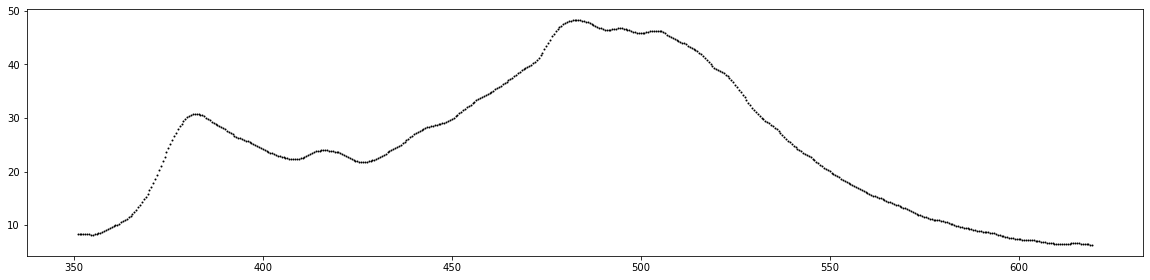

In [212]:
fig= plt.figure( figsize=( 20, 10 ) )

ax= fig.add_subplot( 2, 1, 1 )
# ax.plot( pk, yData[pk], 'o', ms=5 )
ax.plot( x, y1, 'ok', ms=1 )
# ax.plot( xData, testData , 'r--', lw=1.5 )
plt.show()

In [ ]:
shape

In [ ]:
x =x
y =y1

exp_mod = ExponentialModel(prefix='exp_')
gauss1 = GaussianModel(prefix='g1_')
gauss2 = GaussianModel(prefix='g2_')


def index_of(arrval, value):
    """Return index of array *at or below* value."""
    if value < min(arrval):
        return 0
    return max(np.where(arrval <= value)[0])


ix1 = index_of(x, 400)
ix2 = index_of(x, 490)
# ix3 = index_of(x, 175)

pars1 = exp_mod.guess(y[:ix1], x=x[:ix1])
pars2 = gauss1.guess(y[ix1:ix2], x=x[ix1:ix2])
# pars3 = gauss2.guess(y[ix2:ix3], x=x[ix2:ix3])

pars = pars1 + pars2 #+ pars3
mod = gauss1 + gauss2 + exp_mod

out = mod.fit(y, pars, x=x)

# print(out.fit_report(min_correl=0.5))

plt.plot(x, y)
plt.plot(x, out.init_fit, '--', label='initial fit')
plt.plot(x, out.best_fit, '-', label='best fit')
plt.legend()
plt.show()

C:\Users\Asus\anaconda3\lib\site-packages\scipy\optimize\minpack.py:476: RuntimeWarning: Number of calls to function has reached maxfev = 3400.
  warnings.warn(errors[info][0], RuntimeWarning)


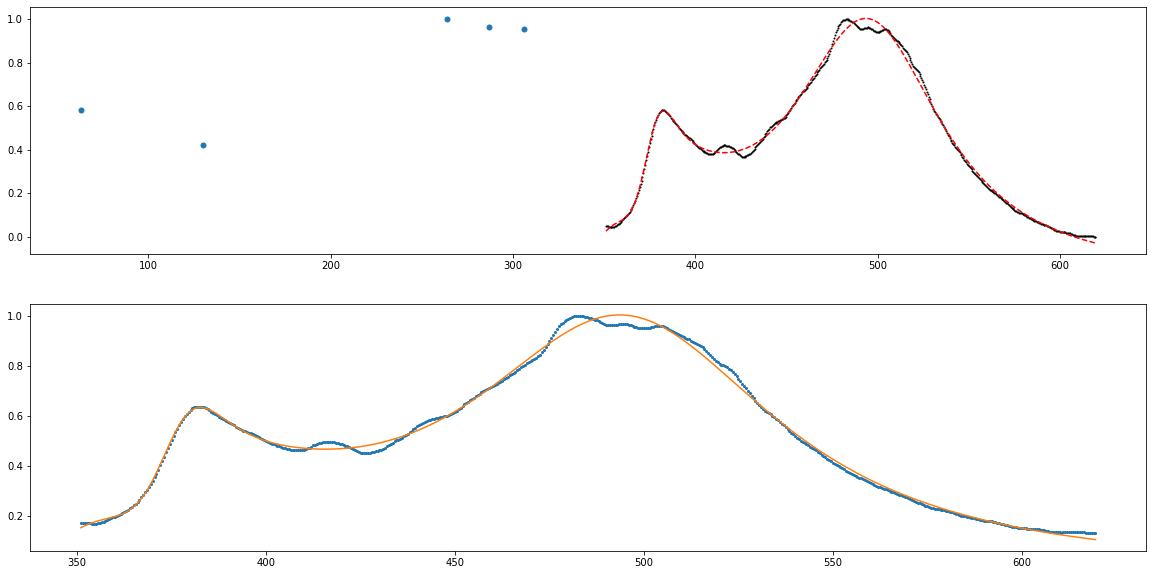

In [161]:
y0 =y1
yData =y1
xData =x

yGround = min( yData ) #0.0
yData = yData - yGround
yAmp = max( yData )#1.0
yData = yData / yAmp 

#initial properties of peaks 
pk, properties = find_peaks( yData, height = .05, width = 3 )
#extract peak heights and fwhm 
I = properties [ 'peak_heights' ]
fwhm = properties[ 'widths' ]


guess = [0]
for i in range( len( pk ) ): 
    guess.append( pk[i] )
    guess.append( I[i] )
    guess.append( fwhm[i] ) 
guess=np.array( guess )


popt, pcov = leastsq( res_multi_lorentz, x0=guess, args=( xData, yData ) )
# print( popt )


testData = [ multi_lorentz( x, popt ) for x in xData ]
fitData = [ yGround + yAmp * multi_lorentz( x, popt ) for x in xData ]

fig= plt.figure( figsize=( 20, 10 ) )

ax= fig.add_subplot( 2, 1, 1 )
bx= fig.add_subplot( 2, 1, 2 )

ax.plot( pk, yData[pk], 'o', ms=5 )
ax.plot( xData, yData, 'ok', ms=1 )
ax.plot( xData, testData , 'r--', lw=1.5 )

bx.plot( xData, y0, ls='', marker='o', markersize=2 )
bx.plot( xData, fitData )


plt.show()

In [28]:
pk, properties = find_peaks( fitData, height = .05, width = 3 )#, prominence=0.1 )
#extract peak heights and fwhm 
I = properties [ 'peak_heights' ]
fwhm = properties[ 'widths' ]

fwhm ,I

(array([ 32.3956507 , 181.42896471]), array([30.58142421, 48.41385883]))

In [24]:
print( popt )

[-4.49058050e-03  3.77002580e+02  2.77731841e+00 -1.77008708e+01
  3.58668711e+02  1.92301459e+00 -6.42093434e+01  4.94226812e+02
  1.25510740e+00  5.25646189e+01  1.50900045e+02 -3.28381341e+01
 -4.60054526e+01  3.74927000e+02 -2.98949570e+00 -2.02413284e+01]


In [219]:
df=pd.DataFrame(index=np.linspace(0,10,num=1000),columns=['int'])
df

,int
0.00000,NaN
0.01001,NaN
0.02002,NaN
0.03003,NaN
0.04004,NaN
...,...
9.95996,NaN
9.96997,NaN
9.97998,NaN
9.98999,NaN


In [ ]:
amp1 = 1
cen1 = 1
sigma1 = 0.05


def _ngaussian(x, amps,cens,sigmas):
    fn = 0
    if len(amps)== len(cens)== len(sigmas):
        for i in range(len(amps)):
            fn = fn+amps[i]*(1/(sigmas[i]*(np.sqrt(2*np.pi))))*\
            (np.exp((-1.0/2.0)*(((x-cens[i])/sigmas[i])**2)))
            fn = fn+np.random.normal(size=len(x), scale=0.05)
    else:
        print('Your inputs have unequal lengths')
    return fn

amps = [1.30, 0.92, 2.11]
cens = [1.10, 1.73, 2.06]
sigmas=[0.05, 0.09, 0.07]

popt_peaks = [amps,cens,sigmas]


df['peaks'] = _ngaussian(df.index, *popt_peaks)

# create a model with 3 Gaussians: pretty easy to generalize
# to a loop to make N peaks
model = (GaussianModel(prefix='p1_') +
         GaussianModel(prefix='p2_') +
         GaussianModel(prefix='p3_') )

# create Parameters (named from function arguments). For
# Gaussian, Lorentzian, Voigt, etc these are "center", "amplitude", "sigma"
params = model.make_params(p1_center=1.0, p1_amplitude=2, p1_sigma=0.1,
                           p2_center=1.5, p2_amplitude=2, p2_sigma=0.1,
                           p3_center=2.0, p3_amplitude=2, p3_sigma=0.1)

# Parameters can have min/max bounds, be fixed (`.vary = False`)
# or constrained to a mathematical expression of other Parameter values
params['p1_center'].min = 0.8
params['p1_center'].max = 1.5

params['p2_center'].min = 1.1
params['p2_center'].max = 1.9

params['p3_center'].min = 1.88
params['p3_center'].max = 3.00

# run the fit
result = model.fit(df['peaks'], params, x=df.index)

# print out the fit results
print(result.fit_report())

# plot results
plt.plot(df.index, df['peaks'],     'o', label='data')
plt.plot(df.index, result.best_fit, '-', label='fit')
plt.legend()
plt.gca().set_xlim(0, 3)
plt.show()

# sample2

In [38]:
pk2, properties2 = find_peaks(y2 , height=3, width = 3,prominence=0.1 ) 

I2 = properties2 ['peak_heights'] #amplitude
fwhm2 = (properties2['widths']) #full width half maximum 

fwhm2,I2

(array([ 33.04410615,  17.22087757, 186.42082633]),
 array([40.427269, 27.778406, 52.336339]))

C:\Users\Asus\anaconda3\lib\site-packages\scipy\optimize\minpack.py:476: RuntimeWarning: Number of calls to function has reached maxfev = 2200.
  warnings.warn(errors[info][0], RuntimeWarning)


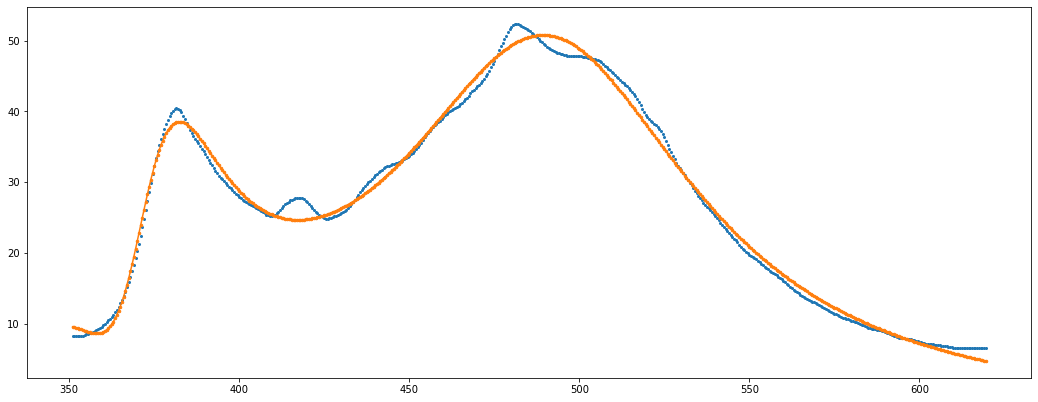

In [41]:
y0 =y2
yData =y2

xData =x
yGround = min( yData )
yData = yData - yGround
yAmp = max( yData )
yData = yData / yAmp 

#initial properties of peaks 
pk, properties = find_peaks( yData, height = .05, width = 3) #prominence=0.1 )
#extract peak heights and fwhm 
I = properties [ 'peak_heights' ]
fwhm = properties[ 'widths' ]

guess = [0]

for i in range( len( pk ) ): 
    guess.append( pk[i] )
    guess.append( I[i] )
    guess.append( fwhm[i] ) 

guess=np.array( guess )

popt, pcov = leastsq( res_multi_lorentz, x0=guess, args=( xData, yData ) )
# print( popt )


testData = [ multi_lorentz( x, popt ) for x in xData ]
fitData = [ yGround + yAmp * multi_lorentz( x, popt ) for x in xData ]

fig= plt.figure( figsize=( 18, 15 ) )

# ax= fig.add_subplot( 2, 1, 1 )
bx= fig.add_subplot( 2, 1, 2 )

# ax.plot( pk, yData[pk], 'o', ms=5 )
# ax.plot( xData, yData, 'ok', ms=1 )
# ax.plot( xData, testData , 'r--', lw=1.5 )

bx.plot( xData, y0, ls='', marker='o', markersize=2 )
bx.plot( xData, fitData ,marker='o', markersize=2.5 )


plt.show()

In [42]:
pk, properties = find_peaks( fitData, height = .05, width = 3 )
#extract peak heights and fwhm 
I = properties [ 'peak_heights' ]
fwhm = properties[ 'widths' ]

fwhm ,I

(array([ 40.99624331, 185.15899833]), array([38.5459424 , 50.79176739]))

# sampl3

In [43]:
pk3, properties3 = find_peaks(y3 , height=3, width = 3,prominence=0.1 ) 

I3 = properties3 ['peak_heights'] #amplitude
fwhm3 = (properties3['widths']) #full width half maximum 

fwhm3,I3

(array([ 37.40364474,  16.31264104, 200.36678614]),
 array([37.203542, 36.296903, 62.694144]))

C:\Users\Asus\anaconda3\lib\site-packages\scipy\optimize\minpack.py:476: RuntimeWarning: Number of calls to function has reached maxfev = 2200.
  warnings.warn(errors[info][0], RuntimeWarning)


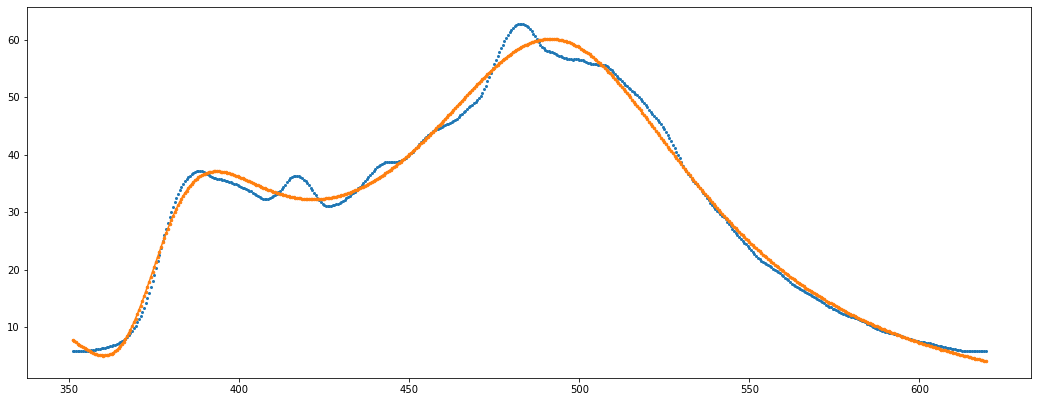

In [44]:
y0 =y3
yData =y3

xData =x
yGround = min( yData )
yData = yData - yGround
yAmp = max( yData )
yData = yData / yAmp 

#initial properties of peaks 
pk, properties = find_peaks( yData, height = .05, width = 3) #prominence=0.1 )
#extract peak heights and fwhm 
I = properties [ 'peak_heights' ]
fwhm = properties[ 'widths' ]

guess = [0]

for i in range( len( pk ) ): 
    guess.append( pk[i] )
    guess.append( I[i] )
    guess.append( fwhm[i] ) 

guess=np.array( guess )

popt, pcov = leastsq( res_multi_lorentz, x0=guess, args=( xData, yData ) )
# print( popt )


testData = [ multi_lorentz( x, popt ) for x in xData ]
fitData = [ yGround + yAmp * multi_lorentz( x, popt ) for x in xData ]

fig= plt.figure( figsize=( 18, 15 ) )

# ax= fig.add_subplot( 2, 1, 1 )
bx= fig.add_subplot( 2, 1, 2 )

# ax.plot( pk, yData[pk], 'o', ms=5 )
# ax.plot( xData, yData, 'ok', ms=1 )
# ax.plot( xData, testData , 'r--', lw=1.5 )

bx.plot( xData, y0, ls='', marker='o', markersize=2 )
bx.plot( xData, fitData ,marker='o', markersize=2.5 )


plt.show()

In [45]:
pk, properties = find_peaks( fitData, height = .05, width = 3 )#, prominence=0.1 )
#extract peak heights and fwhm 
I = properties [ 'peak_heights' ]
fwhm = properties[ 'widths' ]

fwhm ,I

(array([ 39.66372596, 219.90913013]), array([37.10200691, 60.12818322]))

# sample4

In [194]:
pk4, properties4 = find_peaks(y4 , height=3, width = 3,prominence=0.1 ) 

I4 = properties4 ['peak_heights'] #amplitude
fwhm4= (properties4['widths']) #full width half maximum 

fwhm4,I4

(array([243.35659407,  12.91436863,  27.65609836,   8.17310307,
         17.2053897 ]),
 array([23.771622, 17.527781, 16.449155, 15.758147, 17.301943]))

In [195]:
pk4

array([ 60, 130, 167, 208, 260], dtype=int64)

C:\Users\Asus\anaconda3\lib\site-packages\scipy\optimize\minpack.py:476: RuntimeWarning: Number of calls to function has reached maxfev = 3400.
  warnings.warn(errors[info][0], RuntimeWarning)


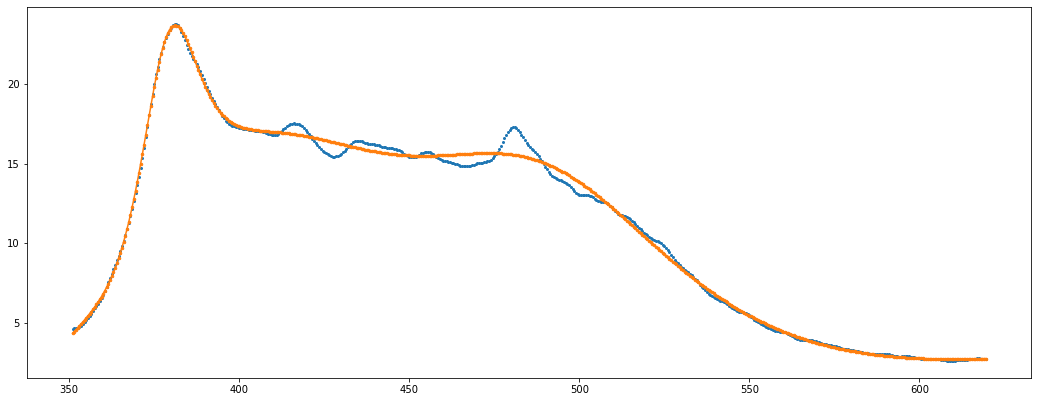

In [52]:
y0 =y4
yData =y4

xData =x
yGround = min( yData )
yData = yData - yGround
yAmp = max( yData )
yData = yData / yAmp 

#initial properties of peaks 
pk, properties = find_peaks( yData, height = .05, width = 3 )#prominence=0.1 )
#extract peak heights and fwhm 
I = properties [ 'peak_heights' ]
fwhm = properties[ 'widths' ]

guess = [0]

for i in range( len( pk ) ): 
    guess.append( pk[i] )
    guess.append( I[i] )
    guess.append( fwhm[i] ) 

guess=np.array( guess )

popt, pcov = leastsq( res_multi_lorentz, x0=guess, args=( xData, yData ) )
# print( popt )


testData = [ multi_lorentz( x, popt ) for x in xData ]
fitData = [ yGround + yAmp * multi_lorentz( x, popt ) for x in xData ]

fig= plt.figure( figsize=( 18, 15 ) )

# ax= fig.add_subplot( 2, 1, 1 )
bx= fig.add_subplot( 2, 1, 2 )

# ax.plot( pk, yData[pk], 'o', ms=5 )
# ax.plot( xData, yData, 'ok', ms=1 )
# ax.plot( xData, testData , 'r--', lw=1.5 )

bx.plot( xData, y0, ls='', marker='o', markersize=2 )
bx.plot( xData, fitData ,marker='o', markersize=2.5 )


plt.show()

In [67]:
pk, properties = find_peaks( fitData, height = .05, width = 3 )#, prominence=0.1 )
#extract peak heights and fwhm 
I = properties [ 'peak_heights' ]
fwhm = properties[ 'widths' ]

max(fwhm ),max(I)

(198.72544084778616, 91.6236162932765)

# sample5

In [61]:
pk5, properties5 = find_peaks(y5 , height=3, width = 3,prominence=0.1 ) 

I5 = properties5 ['peak_heights'] #amplitude
fwhm5= (properties5 ['widths']) #full width half maximum 

fwhm5,I5

(array([ 29.80719506,  17.12119097, 191.15678736]),
 array([50.915769, 48.165562, 94.822116]))

C:\Users\Asus\anaconda3\lib\site-packages\scipy\optimize\minpack.py:476: RuntimeWarning: Number of calls to function has reached maxfev = 2200.
  warnings.warn(errors[info][0], RuntimeWarning)


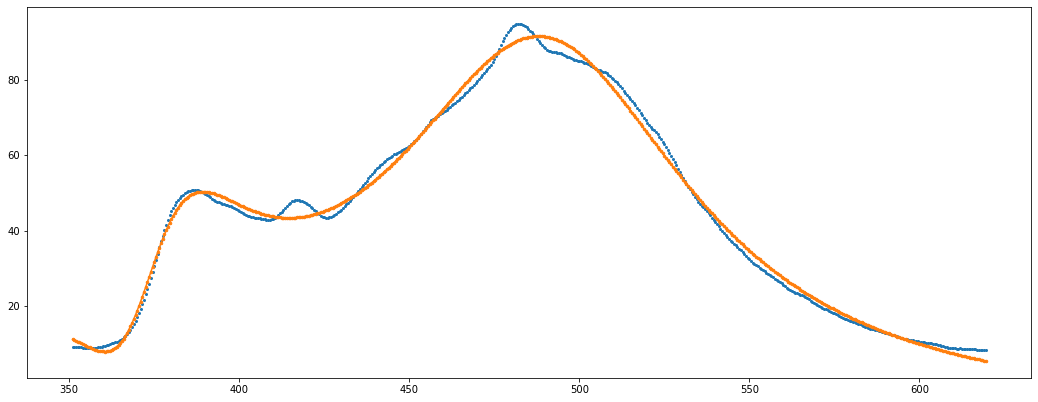

In [62]:
y0 =y5
yData =y5

xData =x
yGround = min( yData )
yData = yData - yGround
yAmp = max( yData )
yData = yData / yAmp 

#initial properties of peaks 
pk, properties = find_peaks( yData, height = .05, width = 3 )#prominence=0.1 )
#extract peak heights and fwhm 
I = properties [ 'peak_heights' ]
fwhm = properties[ 'widths' ]

guess = [0]

for i in range( len( pk ) ): 
    guess.append( pk[i] )
    guess.append( I[i] )
    guess.append( fwhm[i] ) 

guess=np.array( guess )

popt, pcov = leastsq( res_multi_lorentz, x0=guess, args=( xData, yData ) )
# print( popt )


testData = [ multi_lorentz( x, popt ) for x in xData ]
fitData = [ yGround + yAmp * multi_lorentz( x, popt ) for x in xData ]

fig= plt.figure( figsize=( 18, 15 ) )

# ax= fig.add_subplot( 2, 1, 1 )
bx= fig.add_subplot( 2, 1, 2 )

# ax.plot( pk, yData[pk], 'o', ms=5 )
# ax.plot( xData, yData, 'ok', ms=1 )
# ax.plot( xData, testData , 'r--', lw=1.5 )

bx.plot( xData, y0, ls='', marker='o', markersize=2 )
bx.plot( xData, fitData ,marker='o', markersize=2.5 )


plt.show()

# Uv

In [98]:
uv= pd.read_excel(r'C:\Users\Asus\Desktop\solar_cell\Paper 1\absorption.xlsx' ,sheet_name='Sheet2')

In [99]:
uv.dropna(axis=1, how='all',inplace=True)

In [100]:
uv=uv.copy().rename(columns={'Unnamed: 0': 'wavelength(nm)',
                           })

In [101]:
uv.drop(['Unnamed: 3','Unnamed: 6','Unnamed: 9','Unnamed: 12'], axis=1, inplace=True)